In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression



## Problem 1

### part 1

In [ ]:

diabetes_df = pd.read_csv('/content/drive/MyDrive/datasets/inference/hw4/diabetes.csv')

# Extract BMI values for individuals without diabetes
population_bmi = diabetes_df.loc[diabetes_df['Outcome'] == 0, 'BMI'].values

# Define the sample size
sample_size = 50
np.random.seed(1)

# Bootstrapping: randomly sample from the population with replacement
bootstrap_samples = np.random.choice(population_bmi, size=sample_size, replace=True)


print("Bootstrap Sample:")
print(bootstrap_samples)

Bootstrap Sample:
[42.7 30.8 19.5 34.  26.2 23.7 23.6 42.8  0.   0.  35.  37.7 38.5 31.2
 25.4 27.8 37.8 38.7 36.5 42.4 27.8 28.7 23.1 35.8 35.7 39.  24.4 24.7
 24.  24.6 22.4 21.8 38.1 46.3 31.6 30.1 33.1 31.2 36.7 46.3 23.7 39.3
 37.2 29.3 29.7  0.  28.1 24.3 30.1 32. ]


### Part 2
In this part we repeat this process for 1000 times and then calculate mean for each sample.Then we will sort means and our answer will be (50th, 950th) element in sorted list of means.

In [ ]:
# Number of bootstrap repetitions
num_repetitions = 1000

# Bootstrap resampling and calculation of sample means
bootstrap_means = [np.mean(np.random.choice(bootstrap_samples, size=sample_size, replace=True)) for _ in range(num_repetitions)]

# Calculate confidence interval using percentile method
lower_percentile = np.percentile(bootstrap_means, 5)  # 5th percentile for 90% confidence interval
upper_percentile = np.percentile(bootstrap_means, 95)  # 95th percentile for 90% confidence interval


print("90% Confidence Interval for the Mean (Bootstrap Percentile Method):")
print("Lower Bound:", lower_percentile)
print("Upper Bound:", upper_percentile)


90% Confidence Interval for the Mean (Bootstrap Percentile Method):
Lower Bound: 27.5928
Upper Bound: 32.1842


### Part 3

In [ ]:
# Calculate bootstrap mean
bootstrap_mean = np.mean(bootstrap_means)

# Calculate population mean
population_mean = np.mean(population_bmi)


print("Bootstrap Mean:", bootstrap_mean)
print("Population Mean:", population_mean)


Bootstrap Mean: 29.936392
Population Mean: 30.3042


### Part 4

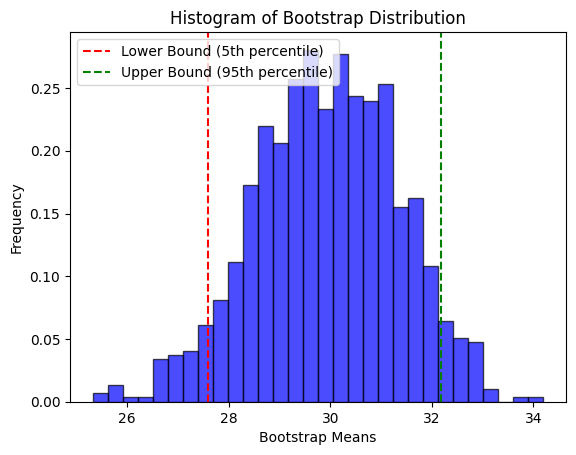

In [ ]:
# Plot histogram of bootstrap distribution
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap Distribution')

# Add vertical lines for confidence interval
plt.axvline(lower_percentile, color='red', linestyle='--', label='Lower Bound (5th percentile)')
plt.axvline(upper_percentile, color='green', linestyle='--', label='Upper Bound (95th percentile)')


plt.legend()
plt.show()


### part 5

Results for Smaller Sample Size (10)
Bootstrap Mean: 29.931179999999998
Population Mean: 30.3042
90% Confidence Interval for the Mean (Bootstrap Percentile Method):
Lower Bound: 26.619999999999997
Upper Bound: 33.163999999999994


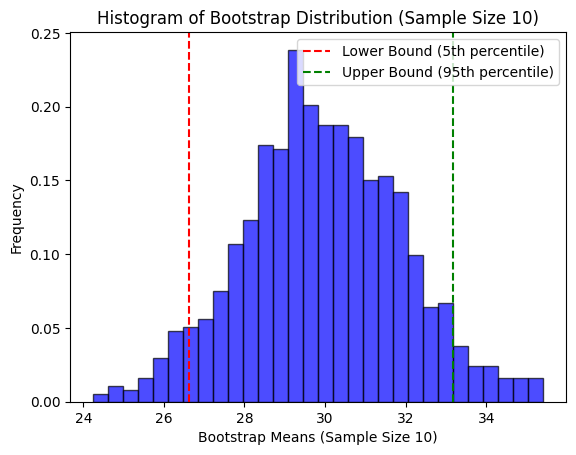

In [ ]:

np.random.seed(0)
# Define the new sample size
small_sample_size = 10

# Bootstrapping for the smaller sample size
small_bootstrap_samples = np.random.choice(population_bmi, size=small_sample_size, replace=True)

# Number of bootstrap repetitions
num_repetitions = 1000

# Bootstrap resampling and calculation of sample means for the smaller sample size
small_bootstrap_means = [np.mean(np.random.choice(small_bootstrap_samples, size=small_sample_size, replace=True)) for _ in range(num_repetitions)]

# Calculate confidence interval using percentile method for the smaller sample size
small_lower_percentile = np.percentile(small_bootstrap_means, 5)  # 5th percentile for 90% confidence interval
small_upper_percentile = np.percentile(small_bootstrap_means, 95)  # 95th percentile for 90% confidence interval

# Calculate bootstrap mean and population mean for the smaller sample size
small_bootstrap_mean = np.mean(small_bootstrap_means)
small_population_mean = np.mean(population_bmi)


print("Results for Smaller Sample Size (10)")
print("Bootstrap Mean:", small_bootstrap_mean)
print("Population Mean:", small_population_mean)
print("90% Confidence Interval for the Mean (Bootstrap Percentile Method):")
print("Lower Bound:", small_lower_percentile)
print("Upper Bound:", small_upper_percentile)


plt.hist(small_bootstrap_means, bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.xlabel('Bootstrap Means (Sample Size 10)')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap Distribution (Sample Size 10)')

# Add vertical lines for confidence interval for the smaller sample size
plt.axvline(small_lower_percentile, color='red', linestyle='--', label='Lower Bound (5th percentile)')
plt.axvline(small_upper_percentile, color='green', linestyle='--', label='Upper Bound (95th percentile)')


plt.legend()
plt.show()


As we see the results we can say that when we reduce the sample the confidence interval for mean becomes wider.

### Part 6
Plots indicate that the distribution of means are normal and around the true mean which given that it's an unbiased estimator was expected. However when sampling size was 100 we had better symmetry

## Problem 2


### Part 1
Conditions of ANOVA test are Independence, Normality and Equality of variances which each of them are mentioned in the question to be satisfied given that **the independent
samples come from normal populations with equal standard
deviations**


### Part 2
$H_0$ : **There is not significant difference between brands**

$H_a$ : **At least one mean lifetime is different among the four brands of batteries.**

### Part 3
We have
$μ_a = 33.6,\ μ_b=30.8,\ μ_c = 29.8,\ \mu_d =28.6\ and\ μ=30.7 $.

Continuing the procedure we will have :

$SSB = Σ_cn_c(\mu_c-μ)^2=68.2$

and

$Σ_{x_i\in brand a}(x_i-\mu_a)^2 = 165.2$

$Σ_{x_i\in brand b}(x_i-\mu_b)^2 = 50.8$

$Σ_{x_i\in brand c}(x_i-\mu_c)^2 = 88.8$

$Σ_{x_i\in brand d}(x_i-\mu_d)^2 = 187.2$

$\Rightarrow SSW = ΣΣ(x_i - μ_{x_i}) = 492$

Then we have that mean squares between is $\frac{68.2}{3}=22.734$ and for mean squares within $\frac{492}{16}=30.75$.
Given this statistics we will have $F=\frac{22.734}{30.75}=0.739$ which it's DOFs will be 3 and 16 so the p_value will be $0.54$.

|          | Sum of squares | Degrees of Freedom | Mean Squares    | F |p_value |
| -------- | -------- | -------- |---|---|--|
| Between brands   | 68.2     | 3     | 22.734|0.739|0.544
| Within brands    | 492     | 16     |30.75|
| total    | 560.2     | 19     |  |


## Problem 3

### Part 1
$H_0$: **There is no significant difference in the mean blood pressure reduction among the three types of medication.**

$H_a$: **At least one of the medications has a different effect on blood pressure reduction compared to the others.**

### part 2
Since the p-value (P(> F)) is less than 0.05 (5% significance level), we reject the null hypothesis. Therefore, we conclude that there is a significant difference in the mean blood pressure reduction among the three types of medication.

### Part 3
$s_p^2 = \frac{SSW}{I(J-1)}=\frac{Σ_i(J-1)SD_i}{I(J-1)}=\frac{3741.12}{39}=95.92⇒s_p=9.79$

$t_39(0.0833)s_p{\sqrt\frac{2}{14}}=9.25$

The difference between **tr3** and **tr1** are signinficant but between other pairs there is not significant difference

### Part 4
Advantage: Bonferroni correction method reduces the likelihood of Type I errors (false positives) by adjusting the significance level for each individual test when conducting multiple comparisons.

Disadvantage: Bonferroni correction method tends to be conservative, meaning it may increase the likelihood of Type II errors (false negatives) by making it harder to reject the null hypothesis, especially when conducting many pairwise comparisons.

## Problem 4


### Part 1

To use the Benjamini-Hochberg method we need to first sort data accending. The next step is to create $q$ list which is $qr/n$ and compare the original data with this q list. Now we need to find the biggest r which satisfies the relation :$p_r\le\frac{qr}{n}$ then return all p-values less than $p_r$ as significant ones.
To do this we will have:


1. Sorted p values = $[0.005, 0.009, 0.019, 0.022, 0.051, 0.101, 0.361, 0.387]$
2. q values = $[0.00625, 0.0125 , 0.01875, 0.025  , 0.03125, 0.0375 , 0.04375,0.05]$
3. For i=4 we have $p_4 < q_4$ and it's the biggest i that satisfies this condition.
4.We return $[0.005, 0.009, 0.019, 0.022]$ as significant ones.

### part 2

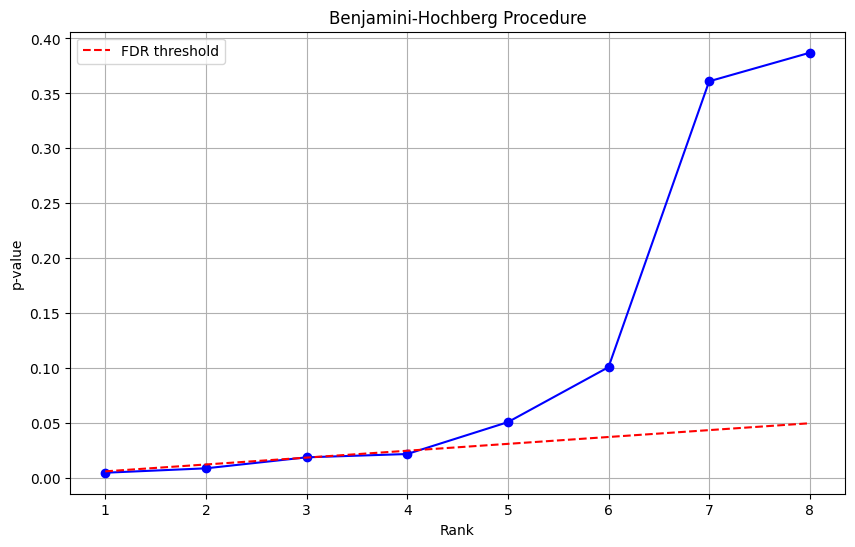

In [ ]:
# Define the p-values
p_values = np.array([0.361, 0.387, 0.005, 0.009, 0.022, 0.051, 0.101, 0.019])

# Sort the p-values
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]

# Calculate the critical value (q)
alpha = 0.05  # FDR level
m = len(p_values)
q_values = np.arange(1, m + 1) / m * alpha


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, m + 1), sorted_p_values, marker='o', linestyle='-', color='b')
plt.plot(np.arange(1, m + 1), q_values, linestyle='--', color='r', label='FDR threshold')
plt.xlabel('Rank')
plt.ylabel('p-value')
plt.title('Benjamini-Hochberg Procedure')
plt.legend()
plt.grid(True)
plt.show()


### Part 3

**False Discovery Rate (FDR) Control Methods (e.g., Benjamini-Hochberg)**:
* Aim to control the expected proportion of false discoveries among all rejected hypotheses.
* Allows for a higher rate of false positives compared to Familywise Error Rate (FWER) control methods.
* Useful when the focus is on minimizing the number of false discoveries while accepting that some errors may occur.

**Familywise Error Rate (FWER) Control Methods (e.g., Bonferroni)**:

* Aim to control the probability of making one or more false discoveries (at least one Type I error) among all hypotheses tested.
* Typically more conservative than FDR methods.
*Guarantees strong control over the probability of making any false discoveries, but may lead to increased Type II errors due to stringent correction.

All in all we can say that FWER is preferred when we dont want definite answer but we use FDR when we are searching for probable candidates

## Problem 5

1. False. When the number of groups increases in multiple comparisons tests, the likelihood of observing a false positive (Type 1 error) also increases. Thus, to maintain the overall significance level (usually denoted as α), the corrected significance level should decrease, not increase.

2. True. If the number of samples increases while the number of parameters remains constant, the degree of freedom for the residuals increases. The degree of freedom for the residuals is determined by subtracting the number of parameters estimated in the model from the total sample size. Therefore, with more samples, there are more data points available to estimate the variability of the residuals, leading to an increase in their degrees of freedom.

3. False. The F distribution is not symmetric around zero. It is a right-skewed distribution, meaning it has a longer right tail.

4. False. The ANOVA test evaluates whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. It does not determine specifically which means are different from each other. Post-hoc tests or pairwise comparisons are used for that purpose.

5. True. If the initial hypothesis (null hypothesis) is rejected in the ANOVA test, it implies that there is at least one group mean that is significantly different from the others. This suggests that the between-group variability, which ANOVA captures, is higher than the within-group variability.

## Problem 6

### Part 1
We solve this part with

$H_0 : mean\ across\ all\ groups\ are \ equall$

$H_a : mean\ of\ different\ aromas\ are\ different$

Using the predefined model we will have :

In [ ]:

# Data
lemon = [11, 10, 12]
floral = [11, 14, 11]
fried_food = [5, 5, 8]
none = [8, 7, 6]

# Combine data into a DataFrame
data = pd.DataFrame({
    'Anagrams_Solved': lemon + floral + fried_food + none,
    'Aroma': ['Lemon'] * 3 + ['Floral'] * 3 + ['Fried Food'] * 3 + ['None'] * 3
})

# Fit ANOVA model
model = ols('Anagrams_Solved ~ C(Aroma)', data=data).fit()

# Print ANOVA table
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)


           df  sum_sq  mean_sq     F   PR(>F)
C(Aroma)  3.0    78.0     26.0  13.0  0.00192
Residual  8.0    16.0      2.0   NaN      NaN


Based on the analysis of the provided data, we reject the null hypothesis $H_0$, indicating that aromas in the environment have a significant impact on the number of solved anagrams.

### Part 2

In [ ]:


# Data
lemon = [11, 10, 12]
floral = [11, 14, 11]
fried_food = [5, 5, 8]
none = [8, 7, 6]

# Combine data into a DataFrame
data = pd.DataFrame({
    'Anagrams_Solved': lemon + floral + fried_food + none,
    'Aroma': ['Lemon'] * 3 + ['Floral'] * 3 + ['Fried Food'] * 3 + ['None'] * 3
})

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(data['Anagrams_Solved'], data['Aroma'], alpha=0.05)

# Print summary of Tukey's test
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    Floral Fried Food     -6.0 0.0036 -9.6978 -2.3022   True
    Floral      Lemon     -1.0  0.822 -4.6978  2.6978  False
    Floral       None     -5.0 0.0108 -8.6978 -1.3022   True
Fried Food      Lemon      5.0 0.0108  1.3022  8.6978   True
Fried Food       None      1.0  0.822 -2.6978  4.6978  False
     Lemon       None     -4.0 0.0347 -7.6978 -0.3022   True
------------------------------------------------------------


### Part 3
One limitation of Tukey's procedure is that it assumes equal sample sizes across all groups. If the sample sizes are unequal, the procedure may not perform optimally and could lead to incorrect conclusions. Additionally, Tukey's procedure does not account for any potential correlations between the groups, which could impact the accuracy of the results, especially in situations where the groups are not independent.







## Problem 7
1. This is a randomized controlled trial, which is an experimental study design. In this type of study, participants are randomly assigned to either a treatment group or a control group.
2. The experimental treatment is the consumption of 25 grams of chia seeds twice a day, while the control treatment is the administration of a placebo.
3. Yes, blocking has been used in this study. The blocking variable is gender. The researchers ensured an even distribution of gender within each group by randomly assigning half of the men and half of the women to the treatment group and the remaining half to the control group.
4. Yes, blinding has been used in this study. The participants were unaware of whether they were receiving the chia seeds or the placebo.
5. It is not explicitly stated, but it's possible that double-blinding was used in this study. This would mean that both the participants and the researchers who administered the treatments were unaware of which participants received the chia seeds and which received the placebo.
6. Based on the findings of the study, we cannot make a causal statement about the effect of chia seeds on appetite or weight loss, as there was no significant difference observed between the treatment and control groups. Additionally, since the study used a relatively small sample size and specific inclusion criteria (volunteers), it may not be appropriate to generalize the conclusion to the population at large without further validation through larger and more representative studies

## Problem 8

### part 1
The relationship between height and weight is described by a linear regression model. The coefficient for the "height" variable is 1.0176. This suggests that, on average, for each additional centimeter increase in height, the weight increases by approximately 1.0176 kilograms.

### part 2
The equation of the regression line is:

$Weight=-105.0113+1.0176*Height$

* The intercept (-105.0113) represents the average difference between participants' height and weight which is due to different characteristics or factors that they possess.
* The slope (1.0176) indicates the estimated change in weight for a one-unit increase in height. In this case, it suggests that, on average, for each additional centimeter increase in height, the weight increases by approximately 1.0176 kilograms.

### Part 3
*   **Null Hypothesis ($H_0$):** There is no association between height and weight ($\beta_1 = 0 $).
*   **Alternative Hypothesis ($H_a$):** There is a significant association between height and weight ($ \beta_1 \neq 0 $).

The t-value for the "height" variable is 23.13, and the p-value is 0.0000. Since the p-value is less than the typical significance level of 0.05, we reject the null hypothesis. Therefore, there is strong evidence that an increase in height is associated with an increase in weight.


### Part 4
**Calculate $R^2$ and interpret it in context:**
    - The coefficient of determination $R^2$ is not provided directly in the information. However, it can be calculated as the square of the correlation coefficient $r$.
    - Given that the correlation coefficient $r$ is 0.72, $R^2$ would be $0.72^2 = 0.5184$, or $51.84%$.
    
  Interpretation: Approximately 51.84% of the variability in weight can be explained by the variability in height. This suggests that the linear regression model with height as the predictor explains about 51.84% of the observed variation in weight among the physically active individuals.This also can indicate that there could be several other factors impacting the weight which makes sense given that parameters like gender or age has strong impact on weight.

## Problem 9

### Part 1
To obtain the variables wanted we have equations:

1. $β_1 = \frac{S_{xy}}{S_{xx}}$
2. $β_0 = y-β_1x̄$
3. $σ^2 = \frac{Σe_i^2}{n-2}$
4. $var(β_1) = \frac{σ^2}{S_{xx}}$
5. $var(β_0) = σ^2\frac{Σx_i^2}{nS_{xx}}$

Plugging in the numbers we will have:
1. $S_{xy}=48.143$
2. $S_{xx} =108.969$
3. $σ^2 = 0.0364$

Meaning that we have :

1. $β_1=0.4418$
2. $β_0=0.1137$
3. $var(β_1)=0.0113$
4. $var(β_0)=0.00033$

### part 2

The confidence interval for β parameters are

$β_0\pm t_{n-2,α/2}SE(β_0)=0.1137\pm 2.306*\sqrt{0.00033} $



In [ ]:


# Given data
X = np.array([2.5, 8.7, 1.2, 7.9, 0.8, 5.3, 4.1, 7.4, 9.6, 0.4])
Y = np.array([1.3, 3.9, 0.6, 3.9, 0.5, 2.4, 2.1, 3.0, 4.4, 0.2])
n = len(X)

# Calculating the regression coefficients
sum_X = np.sum(X)
sum_Y = np.sum(Y)
sum_X_square = np.sum(X**2)
sum_XY = np.sum(X * Y)

beta_1 = (n * sum_XY - sum_X * sum_Y) / (n * sum_X_square - sum_X**2)
beta_0 = (sum_Y - beta_1 * sum_X) / n

# Calculating the error variance
sigma_squared = np.mean((Y - beta_0 - beta_1 * X)**2)

# Calculating the variances of beta_0 and beta_1
mean_X = np.mean(X)
var_beta_0 = sigma_squared * sum_X_square / (n * (sum_X_square - n * mean_X**2))
var_beta_1 = sigma_squared / (sum_X_square - n * mean_X**2)

# Hypothesis testing for beta_0
H0_beta_0 = 0.5
t_stat_beta_0 = (beta_0 - H0_beta_0) / np.sqrt(var_beta_0)
t_critical = t.ppf(0.975, df=n-2)  # 2-tailed test at 5% significance level
p_value_beta_0 = 2 * (1 - t.cdf(abs(t_stat_beta_0), df=n-2))

# Hypothesis testing for regression line passing through the origin
if abs(beta_0) > 0:
    reject_H0_origin = True
else:
    reject_H0_origin = False

# Printing results
print("Regression Coefficients:")
print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("Error Variance (sigma^2):", sigma_squared)
print("Variance of beta_0:", var_beta_0)
print("Variance of beta_1:", var_beta_1)

print("\nHypothesis Testing for beta_0:")
print("t-statistic:", t_stat_beta_0)
print("Critical t-value:", t_critical)
print("p-value:", p_value_beta_0)
if p_value_beta_0 < 0.05:
    print("Reject H0: There is enough evidence to conclude that beta_0 is different from 0.5.")
else:
    print("Fail to reject H0: There is not enough evidence to conclude that beta_0 is different from 0.5.")

print("\nHypothesis Testing for Regression Line Passing through the Origin:")
if reject_H0_origin:
    print("Reject H0: The regression line does not pass through the origin.")
else:
    print("Fail to reject H0: The regression line passes through the origin.")


Regression Coefficients:
beta_0: 0.11375620589341899
beta_1: 0.4418045499178666
Error Variance (sigma^2): 0.029120355330415064
Variance of beta_0: 0.009043507279470085
Variance of beta_1: 0.0002672352258937409

Hypothesis Testing for beta_0:
t-statistic: 1.1962078617524445
Critical t-value: 2.3060041350333704
p-value: 0.26586270189607175
Fail to reject H0: There is not enough evidence to conclude that beta_0 is different from 0.5.

Hypothesis Testing for Regression Line Passing through the Origin:
Reject H0: The regression line does not pass through the origin.


In [ ]:


# Summary statistics for each group
means = [6.21, 2.86, -3.21]
std_devs = [12.3, 7.94, 8.57]
n = 14

# Bonferroni correction: adjusted significance level
alpha = 0.05
k = len(means)  # Number of comparisons
adjusted_alpha = alpha #/ (k * (k - 1) / 2)

# Perform pairwise t-tests
for i in range(len(means)):
    for j in range(i + 1, len(means)):
        mean_diff = means[i] - means[j]
        pooled_std_dev = np.sqrt((std_devs[i]**2 / n) + (std_devs[j]**2 / n))
        t_val = mean_diff / pooled_std_dev

        # Calculate critical value for two-tailed test
        df = 2 * (n - 2)
        crit_val = t.ppf(1 - adjusted_alpha, df)

        # Print results
        print(f"Pairwise comparison: Group {i+1} vs. Group {j+1}")
        print(f"t-value: {t_val}")
        print(f"Critical value: {crit_val}")
        if np.abs(t_val) > crit_val:
            print("Reject null hypothesis: Significant difference")
        else:
            print("Fail to reject null hypothesis: No significant difference")
        print()


Pairwise comparison: Group 1 vs. Group 2
t-value: 0.856177273369538
Critical value: 1.7108820799094275
Fail to reject null hypothesis: No significant difference

Pairwise comparison: Group 1 vs. Group 3
t-value: 2.351146333548405
Critical value: 1.7108820799094275
Reject null hypothesis: Significant difference

Pairwise comparison: Group 2 vs. Group 3
t-value: 1.9440376806158244
Critical value: 1.7108820799094275
Reject null hypothesis: Significant difference



## Problem 10
The confidence interval for prediction in the context of regression analysis provides a range within which we expect individual future observations to fall with a certain level of confidence.

In simple linear regression, the confidence interval for predicting a single new observation \( Y \) at a given value of \( X \) can be calculated using the following formula:

$ \text{CI}(Y_{\text{pred}}) = \hat{Y} \pm t_{\alpha/2}(df) \times SE(Y_{\text{pred}}) $

Where:
- $ \hat{Y} $ is the predicted value of $ Y $ for the given value of $ X $.
- $ t_{\alpha/2,(df)} $ is the critical value from the t-distribution for a given significance level (typically 0.05) and degrees of freedom ($ df = n - 2 $), where $ n $ is the number of data points).
- $ SE(Y_{\text{pred}}) $ is the standard error of the prediction.

The formula for $ SE(Y_{\text{pred}}) $ is:

$ SE(Y_{\text{pred}}) = s \times \sqrt{\frac{1}{n} + \frac{(X - \bar{X})^2}{\sum(x_i - \bar{X})^2}} $

Where:
- $ s $ is the estimated standard deviation of the residuals (often referred to as the "residual standard error").
- $ X $ is the value of the predictor variable for which the prediction is being made.
- $ \bar{X} $ is the mean of the predictor variable.
- $ n $ is the number of data points.

This confidence interval represents the range in which we expect a future observation to fall with a certain level of confidence (typically 95%). It takes into account both the uncertainty in the estimation of the regression line and the variability of individual observations around that line.

It's easy to see that in formula for SE since we are working with a fixed $n$ we can reduce the length of confidence interval only by reducing the term $\frac{(X - \bar{X})^2}{\sum(x_i - \bar{X})^2}$ so at $X=\bar X$ we have least value for $\frac{(X - \bar{X})^2}{\sum(x_i - \bar{X})^2}$ ,hence we have the shortest feasible interval.



## Problem 11

### Part 1
For binomial distribution we have

$L(n,p) = ∏_{i=1}^{k} (p^{x_i} * (1-p)^{1-x_i})⇒lnL(n,p) = ∑_{i=1}^{k} (x_i * ln(p) + (1-x_i) * ln(1-p))
$

Setting derivative of this equation equall to zero we will have

$∑_{i=1}^{k} (\frac{x_i}{p} - \frac{1 - x_i}{1 - p}) = 0 ⇒p̂=\frac{\Sigma_i x_i}{n}$

### part 2
Cramer-Rao states that for every estimated $\hat  θ$ we will have $V[\hat θ]≥\frac{1}{I(θ_0)}$ and from from previous part we have that $\hat θ = \frac{\Sigma_i x_i}{n}$.To solve this problem first we obtain the $V[\hat θ]$ and then find $I(θ_0)$ to show that these two are equall.

$V[\hat θ]=V[\frac{\Sigma_i x_i}{n}]=\frac{1}{n^2}V[{\Sigma_i x_i}]=\frac{1}{n^2}npq=\frac{p(1-p)}{n}$

$ I(p) = -E\left[\frac{d^2}{dp^2} \log L(p \mid X)\right]$$ = -E\left[\frac{-X}{p^2} - \frac{n-X}{(1-p)^2}\right]
 = E\left[\frac{X}{p^2} + \frac{n-X}{(1-p)^2}\right]
 = \frac{n}{p} + \frac{n}{1-p}
 = \frac{n}{p(1-p)}
$

We see that $V[\hat θ]=\frac{1}{θ}$ which is the lower bound across all estimations.

## Problem 12

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load the dataset
path = '/content/drive/MyDrive/datasets/inference/hw4/prostate_analysis_results.csv'
data = pd.read_csv(path)

# Select the columns for analysis
X = data['lcavol'].values
y = data['lpsa'].values

# Fit a linear regression model
slope, intercept, _, _, _ = linregress(X, y)

# Calculate the Cramer-Rao lower bound for the slope coefficient
n = len(X)
X_mean = np.mean(X)
var_residuals = np.var(y - intercept - slope*X)
crlb_slope = np.sqrt(var_residuals / (n * (X_mean**2)))

print("Empirical slope:", slope)
print("Cramer-Rao lower bound for the slope coefficient:", crlb_slope)


Empirical slope: 0.7193203917677408
Cramer-Rao lower bound for the slope coefficient: 0.05861429696248274


As we expected the empirical slope is not lower than what is defined by Cramer Rao.

## Problem 13

### Part 1

In [ ]:
path = '/content/drive/MyDrive/datasets/inference/hw4/prostate_analysis_results.csv'
data = pd.read_csv(path)

# Calculate correlation coefficients
correlation_age = data[['lweight', 'age']].corr().iloc[0, 1]
correlation_lpsa = data[['lweight', 'lpsa']].corr().iloc[0, 1]

print("Correlation coefficient between lweight and age:", correlation_age)
print("Correlation coefficient between lweight and lpsa:", correlation_lpsa)

Correlation coefficient between lweight and age: 0.3479691120147084
Correlation coefficient between lweight and lpsa: 0.4333193824926196


Given that lweight and lspa has stronger correlation coefficient we can say that it's a better predictor.

### Part 2

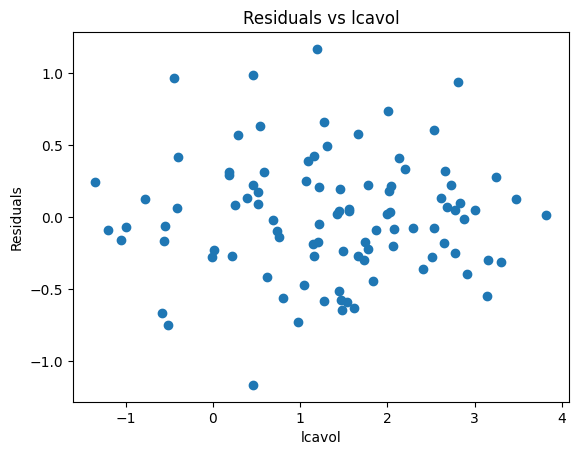

Predictive equation for lweight using lcavol:
lweight = 3.49 + 0.10 * lcavol
Interpretation: For each unit increase in lcavol, lweight increases by 0.10 units.


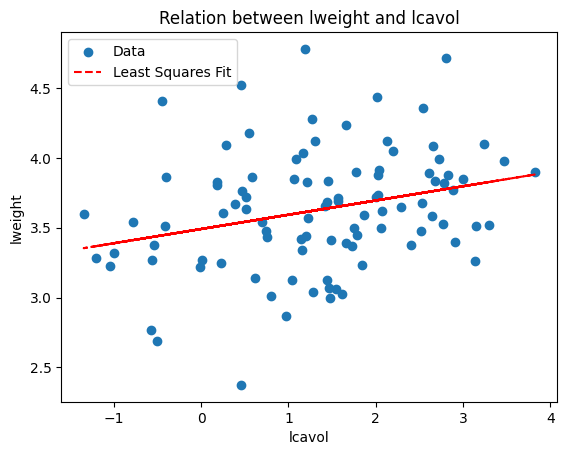

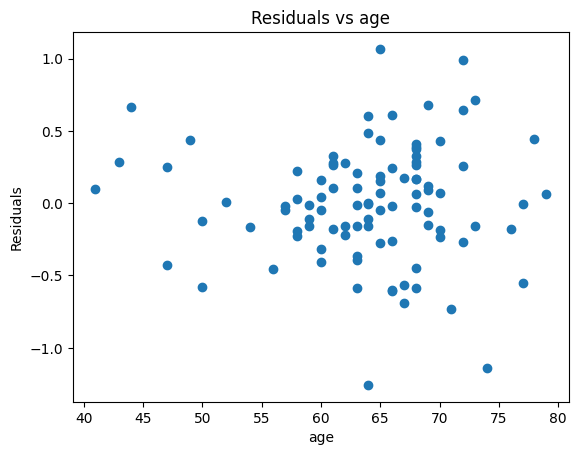

Predictive equation for lweight using age:
lweight = 2.35 + 0.02 * age
Interpretation: For each unit increase in age, lweight increases by 0.02 units.


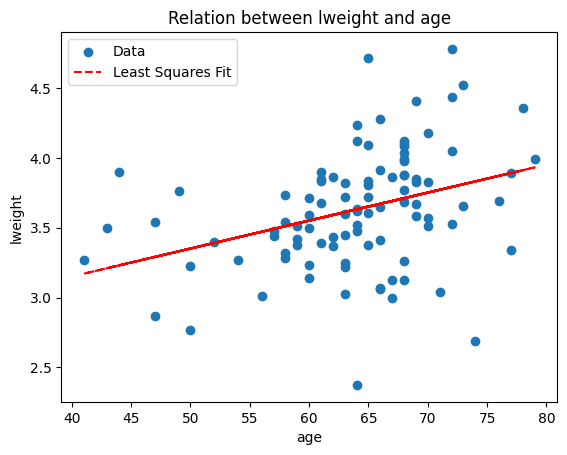

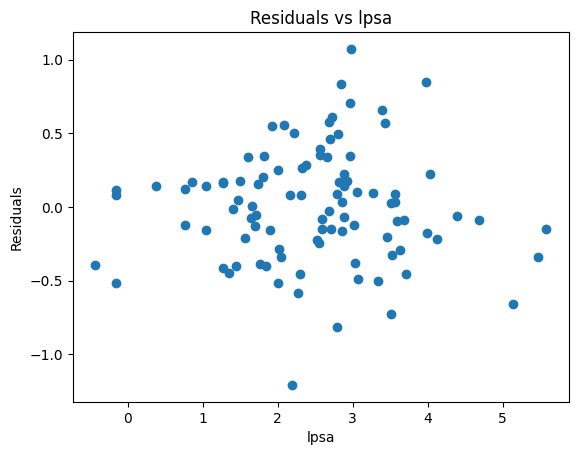

Predictive equation for lweight using lpsa:
lweight = 3.23 + 0.16 * lpsa
Interpretation: For each unit increase in lpsa, lweight increases by 0.16 units.


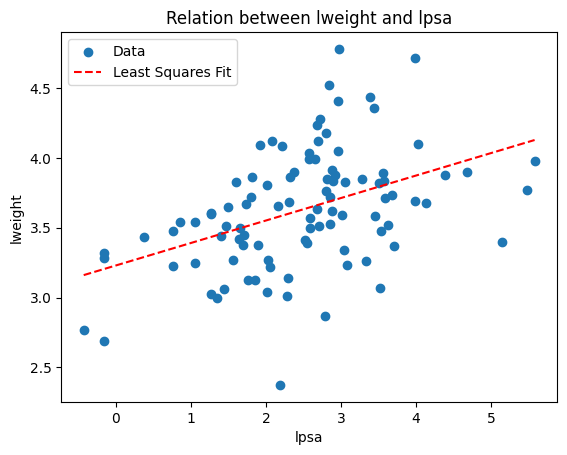

In [ ]:
# Specify the columns to analyze
columns_to_analyze = ['lcavol', 'age', 'lpsa']

# Extract the response variable
response_variable = 'lweight'

# Iterate over each specified column
for column in columns_to_analyze:
    # Extract the explanatory variable
    explanatory_variable = column

    # Extract the data
    X = data[explanatory_variable].values.reshape(-1, 1)
    y = data[response_variable].values

    # a) Scatter plot of residuals
    model = LinearRegression().fit(X, y)
    residuals = y - model.predict(X)
    plt.scatter(X, residuals)
    plt.xlabel(explanatory_variable)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {explanatory_variable}')
    plt.show()

    # b) Compute least squares regression
    slope = model.coef_[0]
    intercept = model.intercept_

    # c) Predictive equation and interpretation
    print(f"Predictive equation for {response_variable} using {explanatory_variable}:")
    print(f"{response_variable} = {intercept:.2f} + {slope:.2f} * {explanatory_variable}")
    print(f"Interpretation: For each unit increase in {explanatory_variable}, {response_variable} increases by {slope:.2f} units.")

    # d) Scatter plot with least-squares fit
    plt.scatter(X, y, label='Data')
    plt.plot(X, model.predict(X), color='red', linestyle='dashed', label='Least Squares Fit')
    plt.xlabel(explanatory_variable)
    plt.ylabel(response_variable)
    plt.title(f'Relation between {response_variable} and {explanatory_variable}')
    plt.legend()
    plt.show()

### Part 3
To find the best predictor we need to look at the residuals and it needs to have a mean of 0 across the plot.The regression line also needs to be a good indicator of variabality of data.Given this points lspa seems to be the significant predictor.

### Part 4

In [ ]:

# Step 1: Choose a random sample of 100 data points
random_sample = data.sample(n=100, random_state=42)

# Step 2: Build Linear Regression models using 90% of the data
X = random_sample[['lcavol', 'lpsa']]
y = random_sample['lweight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model_1 = LinearRegression().fit(X_train, y_train)
model_2 = LinearRegression().fit(X_train['lcavol'].values.reshape(-1, 1), y_train)

# Conduct hypothesis tests to determine significance
# Hypothesis Test for model_1
# Null Hypothesis: Coefficient of lcavol is not significantly different from zero
# Alternative Hypothesis: Coefficient of lcavol is significantly different from zero
t_stat, p_value = stats.ttest_ind(y_train - model_1.predict(X_train), np.zeros(len(y_train)))

if p_value < 0.05:
    print("Model 1 - lcavol is a significant predictor (p-value < 0.05)")
else:
    print("Model 1 - lcavol is not a significant predictor (p-value >= 0.05)")

# Hypothesis Test for model_2
# Null Hypothesis: Coefficient of lcavol is not significantly different from zero
# Alternative Hypothesis: Coefficient of lcavol is significantly different from zero
t_stat, p_value = stats.ttest_ind(y_train - model_2.predict(X_train['lcavol'].values.reshape(-1, 1)), np.zeros(len(y_train)))

if p_value < 0.05:
    print("Model 2 - lcavol is a significant predictor (p-value < 0.05)")
else:
    print("Model 2 - lcavol is not a significant predictor (p-value >= 0.05)")

# Step 3: Calculate the 95% confidence interval for the slope of the relationship
# between the response variable and explanatory variables
def calculate_CI(model, X_train, y_train):
    X_with_intercept = sm.add_constant(X_train)  # Add constant term for intercept
    model = sm.OLS(y_train, X_with_intercept).fit()
    return model.conf_int(alpha=0.05)[1]

CI_model_1 = calculate_CI(model_1, X_train, y_train)
CI_model_2 = calculate_CI(model_2, X_train['lcavol'].values.reshape(-1, 1), y_train)

print("95% Confidence Interval for Model 1 (lcavol):", CI_model_1)
print("95% Confidence Interval for Model 2 (lcavol):", CI_model_2)

# Step 4: Use the models to predict the values of the response variable for the remaining 10% of samples
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test['lcavol'].values.reshape(-1, 1))

# Step 5: Compare the predicted values with actuals and report the success rate
success_rate_1 = np.mean((y_test - y_pred_1) ** 2)
success_rate_2 = np.mean((y_test - y_pred_2) ** 2)

print("Success rate for Model 1 (lcavol):", success_rate_1)
print("Success rate for Model 2 (lcavol):", success_rate_2)